Soil Data Analysis: Melbourne City


**Authored by:** Yash Daware

**User Scenario**
Scenario:

1. As the Melbourne City Council, we aim to leverage the soil data collected from diverse sensor locations across the city. Our goal is to enhance our environmental management strategies and urban planning initiatives. By analyzing soil moisture, temperature, and salinity data, we seek to identify areas vulnerable to environmental challenges such as drought or flooding. This information will guide us in implementing targeted interventions for soil improvement, green infrastructure development, and sustainable urban planning.

2. As a resident of Melbourne, I want to access and understand the soil data collected from sensors in various locations. By having insights into soil health, moisture levels, and temperature, I aim to make informed decisions about sustainable practices for my property. This includes optimizing garden irrigation, choosing appropriate plants, and contributing to the overall environmental health of my neighborhood. Accessible and comprehensible soil data will empower me to actively participate in the city's environmental initiatives and foster a greener and more sustainable community.

**Learning objectives**

At the end of this use case you will be able to:

work with spatial databases using Geopandas

visualise spatial data on an interactive map

**Potential Implications and Applications**
**Environmental Monitoring:**
The soil data collected from various sensor locations in Melbourne plays a crucial role in environmental monitoring, offering valuable insights into the health and dynamics of the region's soil. This data has diverse applications, including precision agriculture, where farmers can optimize irrigation and crop management based on real-time soil moisture information. Additionally, it aids in predicting and managing drought and flood conditions, enabling timely interventions and adaptive strategies to mitigate environmental risks. Furthermore, the data supports biodiversity conservation efforts by providing a comprehensive understanding of soil conditions, contributing to the preservation of natural habitats and ecosystems.

**Policy Making:**
The Melbourne City Council leverages soil data for informed decision-making and policy formulation. The insights gained from environmental monitoring contribute to sustainable urban planning initiatives. The council can use the data to inform land-use planning, promoting the development of green spaces and implementing policies for sustainable urban growth. Moreover, policies focused on water conservation measures can be developed, incentivizing water-efficient practices based on soil moisture levels. The data also facilitates community engagement, empowering residents to actively participate in environmental initiatives. Accessible soil data serves as a foundation for developing community programs that align with the city's sustainability goals.



**Data Sets Used:**

[Soil Sensor Reading Data ](https://data.melbourne.vic.gov.au/explore/dataset/soil-sensor-readings-historical-data/information/)

[Soil Sensor Location Data](https://melbournetestbed.opendatasoft.com/explore/dataset/soil-sensor-locations/information/)

**Analysis Part 1**
This section imports the necessary Python libraries and modules required for the analysis.

In [1]:
pip install folium

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Sensor Location Data
In the next section we use the City of Melbourne Open Data API to access the Soil Sensor location Dataset

In [4]:
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

#Dataset name
dataset = 'soil-sensor-locations'
number_of_records = 84

# Add a filter for the number of results returned
filters = f'records?limit={number_of_records}&offset=0&timezone=UTC'

soil_loc_url = f'{base_url}{dataset}/{filters}'
soil_loc_url

result = requests.get(soil_loc_url)
result_json = result.json()
records = result_json['results']
soil_loc = pd.json_normalize(records)

soil_loc

,site_id,site_name,property_name,latitude,longitude,location.lon,location.lat
0,50921,Replaced by op63369,Fitzroy Gardens,-37.81082691661315,144.98178719594011,144.981787,-37.810827
1,50924,Fitzroy West 09,Fitzroy Gardens,-37.81067469320403,144.979618148459,144.979618,-37.810675
2,64971,5th Fairway,Royal Park,-37.77920999998876,144.95251000000945,144.952510,-37.779210
3,64973,Argyle Square,Argyle Square,-37.8029015228744,144.966010728849,144.966011,-37.802902
4,64976,9th Fairway,Royal Park,-37.78291999998904,144.95566000000628,144.955660,-37.782920
...,...,...,...,...,...,...,...
79,70829,Royal Parade University college,None,-37.79202969998415,144.95872889999418,144.958729,-37.792030
80,72758,Royal Parade South,None,-37.79632980937252,144.9583068956953,144.958307,-37.796330
81,75500,Natures Play,Royal Park,-37.795338542639,144.95093324591195,144.950933,-37.795339
82,75502,Fawkner North,Fawkner Park,-37.838433712973945,144.981016125163,144.981016,-37.838434


We used the City of Melbourne API to load the Soil sensor Dataset which consists of the location in form of longitude and latitude for the sensors whose readings is measured for the sensor readings dataset.

In [6]:
soil_loc['latitude'] = soil_loc['latitude'].astype(float)
soil_loc['longitude'] = soil_loc['longitude'].astype(float)
from folium.plugins import MarkerCluster

# visualising the locations of sensors on an interactive map using the folium library
n = folium.Map(location=[soil_loc['latitude'].mean(), soil_loc['longitude'].mean()])


marker_cluster = MarkerCluster().add_to(n)


for _, row in soil_loc.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Site ID: {row['site_id']}<br>Site Name: {row['site_name']}<br>Property Name: {row['property_name']}",
        icon=folium.Icon(icon="cloud"),
    ).add_to(marker_cluster)

n

In the above section we Visualised the data from the Sensor Location Dataset on a map using folium library, we mapped out the exact locations of the sensors from the latitudes and longitudes of the sensors.

In [7]:
unique_property_names = soil_loc['property_name'].unique()

# Create a dictionary to store site IDs for each property name
site_ids_by_property = {}

# Iterate over unique property names
for property_name in unique_property_names:
    # Filter the DataFrame for the current property name
    filtered_sites = soil_loc[soil_loc['property_name'] == property_name]

    # Get the list of site IDs for the current property name
    site_ids = filtered_sites['site_id'].tolist()

    # Store the list in the dictionary
    site_ids_by_property[property_name] = site_ids

# Display the result
for property_name, site_ids in site_ids_by_property.items():
    print(f"Site IDs with the property name '{property_name}': {site_ids}")

Site IDs with the property name 'Fitzroy Gardens': [50921, 50924, 65011, 75507, 51267, 51268, 75508, 64990, 65007]
Site IDs with the property name 'Royal Park': [64971, 64976, 64980, 64987, 65000, 65010, 75501, 64975, 64996, 65004, 65013, 64974, 64985, 75500]
Site IDs with the property name 'Argyle Square': [64973]
Site IDs with the property name 'Treasury Gardens': [64977, 75509, 64988]
Site IDs with the property name 'Shrine of Remembrance Reserve': [64984, 64986, 64989]
Site IDs with the property name 'Lincoln Square': [64992, 64994]
Site IDs with the property name 'Carlton Gardens South': [65012, 64998]
Site IDs with the property name 'Kings Domain': [66187, 66203, 66190, 66198]
Site IDs with the property name 'Alexandra Gardens': [66195, 66192]
Site IDs with the property name 'None': []
Site IDs with the property name 'Queen Victoria Gardens': [66204]
Site IDs with the property name 'University Square': [70827, 73385, 70826]
Site IDs with the property name 'Birrarung Marr': [75503

The code identifies unique property names in the 'property_name' column of the soil_loc DataFrame. It then creates a dictionary, 'site_ids_by_property,' where each unique property name is associated with a list of corresponding site IDs. The final output displays these associations, indicating the site IDs associated with each unique property name.


---



# Soil Sensor Readings Data
In the next section we use the City of Melbourne Open Data API to access the Soil Sensor Readings Dataset which consists data regarding soil moisture, Soil Salinity and Soil Temperature at various depths.

In [9]:
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.0/catalog/datasets/'

#Dataset name
dataset = 'soil-sensor-readings-historical-data'
number_of_records = 200

# Add a filter for the number of results returned
filters = f'records?limit={number_of_records}&offset=0&timezone=UTC'

soil_reading_url = f'{base_url}{dataset}'
soil_reading_url

'https://data.melbourne.vic.gov.au/api/explore/v2.0/catalog/datasets/soil-sensor-readings-historical-data'

In [11]:
# Function that extracts the data from the JSON
def get_data(base, data_url, offset = 0):

    filters = f'records?limit={100}&offset={offset}&timezone=UTC'
    url = f'{base}{data_url}/{filters}'
    result = requests.get(url)
    # if you need to extract more than 9900 records, enter the api key like below
    #result = requests.get(url + f'&apikey={API_KEY}')
    result_json = result.json()
    max_results = result_json['total_count']
    links = result_json['links']
    records = result_json['records']
    records_df = pd.json_normalize(records)

    # fix columns names
    records_df.drop(columns=['links'],inplace=True)
    column_names = records_df.columns.values.tolist()

    column_names = [i.split('.')[-1] for i in column_names]
    records_df.columns = column_names

    next_url = None

    # get next url
    if records_df.shape[0] != max_results:
        for l in links:
            if l['rel']=='next':
                next_url = l['href']

    return [records_df, next_url, column_names]

In [12]:
# Appends each set of data
def add_to_dataframe(dataframe, new_data):
    df = pd.concat([dataframe, new_data])
    return df

# Call the function and produce a dataframe
soil_df = extract_dataframe("soil-sensor-readings-historical-data")

In [13]:
soil_df

,id,timestamp,size,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype
0,200a9ce3d716056e20f45f6cf7d4ac72aec4cbf3,2023-09-01T07:08:46.91Z,128,2023-03-26T07:00:00+00:00,Treasury West,75509,16606654,1619058,Soil Moisture 80cm #0,48.91,%VWC,SoilSensorData
1,f33bd259c443e08967d418c19a5e849aa4df5eff,2023-09-01T07:08:46.91Z,134,2023-03-26T07:00:00+00:00,Treasury West,75509,16606662,1619067,Soil Temperature 80cm #0,17.96,ºC,SoilSensorData
2,57a6d3071c60c235c629c95d611ce81ea6ff112e,2023-09-01T07:08:46.91Z,134,2023-03-26T07:00:00+00:00,Princes Park Lawn 5,64993,16606675,1303869,Soil Moisture 40cm #0,33.79,%VWC,SoilSensorData
3,c517ba2d7110eeadf8c0b3311158b3e1f2ca0699,2023-09-01T07:08:46.91Z,140,2023-03-26T07:00:00+00:00,Princes Park Lawn 5,64993,16606694,1303877,Soil Salinity 30cm #0,0.21,µS/cm,SoilSensorData
4,fc9e9f6c4e8a522c36539070ad916fac8cc7db03,2023-09-01T07:08:46.91Z,140,2023-03-26T07:00:00+00:00,Princes Park Lawn 5,64993,16606713,1303875,Soil Salinity 10cm #0,0.07,µS/cm,SoilSensorData
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2938b459e0e988335e39ececbcc3c1b290c4ab54,2023-09-01T07:08:46.91Z,136,2023-02-08T19:00:00+00:00,Bourke North 4,64983,16039392,1311659,Soil Moisture 60cm #0 (Sand),23.19,%VWC,SoilSensorData
96,c521e1427eb2f33b6e76fc0401b24f0d3279544b,2023-09-01T07:08:46.91Z,134,2023-02-09T05:00:00+00:00,Princes Park Lawn 5,64993,16039411,1303867,Soil Moisture 20cm #0,25.09,%VWC,SoilSensorData
97,fa5be62a0a45f9d5d1702d4b89cb8681c94b2e46,2023-09-01T07:08:46.91Z,134,2023-02-08T23:00:00+00:00,Bourke North 4,64983,16039414,1311651,Soil Temperature 70cm #0,21.20,ºC,SoilSensorData
98,17f7b947923efd5ab44a656624b846786fb23675,2023-09-01T07:08:46.91Z,134,2023-02-08T21:00:00+00:00,Bourke North 4,64983,16039418,1311651,Soil Temperature 70cm #0,21.20,ºC,SoilSensorData


We have sucessfully used the City of Melbourne API to obtain the Sensor Readings Dataset which gives us readings for Soil Moisture, Soil Salinity and Soil Temperature at various depths, this data is colltedted from the locations we visualised in the previous section.

In [16]:
# Iterate over the 'probe_measure' column in the 'soil_df' dataset
for index, value in soil_df['probe_measure'].items():
    # Remove #0 and leading/trailing whitespaces
    value_without_hash = value.replace('#0', '').strip()

    # Update the value in the 'probe_measure' column
    soil_df.at[index, 'probe_measure'] = value_without_hash



The above code iterates through the 'probe_measure' column in the 'soil_df' dataset, removes the '#0' and leading/trailing whitespaces from each value, and updates the 'probe_measure' column with the modified values.

# Soil Moisture Analysis

In the following part we analyse the sensor readings which are about the soil moisture data from the various sensor locations

In [61]:
# Define the values related to Soil Moisture
soil_moisture_values = ['Soil Moisture 10cm', 'Soil Moisture 20cm', 'Soil Moisture 30cm',
                        'Soil Moisture 40cm', 'Soil Moisture 50cm', 'Soil Moisture 60cm',
                        'Soil Moisture 70cm', 'Soil Moisture 80cm']

# Filter rows where 'probe measure' contains Soil Moisture values
soil_moisture_table = soil_df[soil_df['probe_measure'].isin(soil_moisture_values)]

# Sort the table by 'local_time'
soil_moisture_table = soil_moisture_table.sort_values(by=['probe_measure', 'local_time'])

# Display the new table
soil_moisture_table


,id,timestamp,size,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,date
12,c0f8a4ce87c448fe5cc1942addd6756c703a2701,2023-09-01T07:08:46.91Z,126,2023-01-18 05:30:00+00:00,Bourke South 3,88425,15756195,1914084,Soil Moisture 10cm,81.39,%VWC,SoilSensorData,2023-01-18
9,8bf4019e6a23a9b05584c6856193adf71c5ad755,2023-09-01T07:08:46.91Z,142,2023-01-18 06:00:00+00:00,Princess bridge East p06,101038,15758879,2019369,Soil Moisture 10cm,0.10,µS/cm,SoilSensorData,2023-01-18
64,feb7083bbe392480789f1374185fc1579837e4fc,2023-09-01T07:08:46.91Z,132,2023-01-18 06:30:00+00:00,Bourke South 3,88425,15754640,1914099,Soil Moisture 10cm,0.37,µS/cm,SoilSensorData,2023-01-18
9,e1f18a5d3bb4325d4f3905c4abdc4ee9db4adeef,2023-09-01T07:08:46.91Z,153,2023-01-18 07:00:00+00:00,Fitzroy Gardens West '18,65011,15754424,1305927,Soil Moisture 10cm,28.35,%VWC,SoilSensorData,2023-01-18
64,facd90e16e71ef92b9ea82c249971f92a56a7777,2023-09-01T07:08:46.91Z,145,2023-01-18 07:00:00+00:00,Fitzroy Gardens West '18,65011,15755100,1305924,Soil Moisture 10cm,16.18,ºC,SoilSensorData,2023-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,f62f85504cccf018b12d00c2c405d3a63bcb1668,2023-09-01T07:08:46.91Z,136,2023-03-26 17:00:00+00:00,Bourke North 2,65006,16613055,1311840,Soil Moisture 80cm,27.85,%VWC,SoilSensorData,2023-03-26
0,458e729d7a5f03969d73ce7ee556eacd243ad1f9,2023-09-01T07:08:46.91Z,142,2023-03-26 17:00:00+00:00,Carlton Gardens North,64979,16613346,1306522,Soil Moisture 80cm,16.61,ºC,SoilSensorData,2023-03-26
87,60b6f507ee613ad9ded3f4e3fbaf20c477a97b42,2023-09-01T07:08:46.91Z,142,2023-03-26 17:00:00+00:00,Carlton Gardens North,64979,16614234,1306513,Soil Moisture 80cm,0.19,µS/cm,SoilSensorData,2023-03-26
22,cfbc20284c3354eef3be443faa2ff4589e56b3e5,2023-09-01T07:08:46.91Z,131,2023-03-26 17:00:00+00:00,8th Green,64980,16614430,1304463,Soil Moisture 80cm,37.71,%VWC,SoilSensorData,2023-03-26


The first part defines a list of values related to soil moisture and filters the 'soil_df' dataset to create a new table, 'soil_moisture_table,' containing rows where the 'probe_measure' column matches the specified soil moisture values. It then displays the new table.

The second part specifically filters the 'soil_moisture_table' for soil moisture values ('Soil Moisture 10cm' to 'Soil Moisture 80cm') and creates separate dataframes ('soil_moisture_010cm' to 'soil_moisture_080cm') for each level, sorting them by the 'local_time' column.

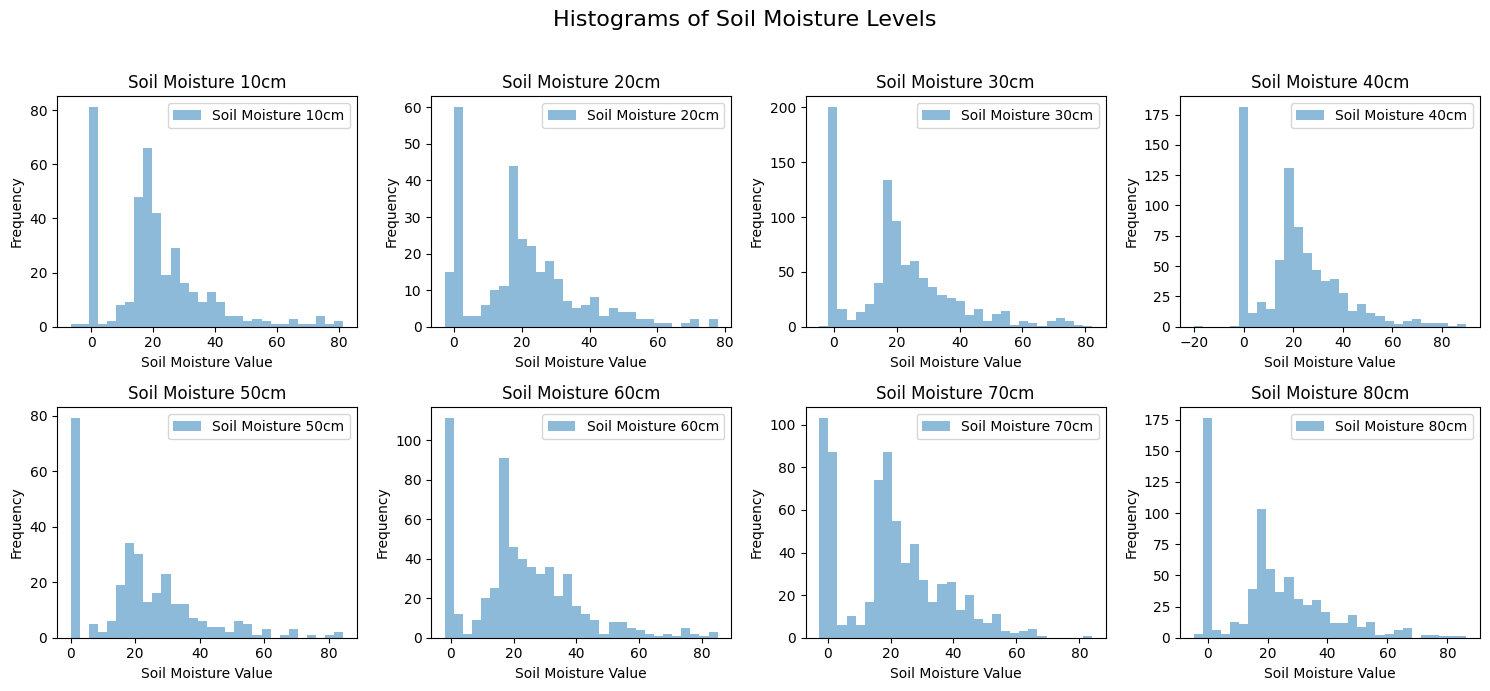

In [22]:
# Filter rows where 'probe measure' contains Soil Moisture values
soil_moisture_table = soil_df[soil_df['probe_measure'].isin(soil_moisture_values)]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Moisture Levels', fontsize=16)

# Ploting histograms for each soil moisture level
for i, moisture_level in enumerate(soil_moisture_values):
    subset = soil_moisture_table[soil_moisture_table['probe_measure'] == moisture_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=moisture_level)
    axes[row, col].set_title(moisture_level)
    axes[row, col].set_xlabel('Soil Moisture Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The code generates a grid of subplots (2 rows, 4 columns) displaying histograms of soil moisture levels for different depths (10cm, 20cm, ..., 80cm). Each subplot represents a specific soil moisture level, and the histograms visualize the distribution of soil moisture values for the corresponding depth. The code provides an organized and comparative visualization of soil moisture data across different depths.

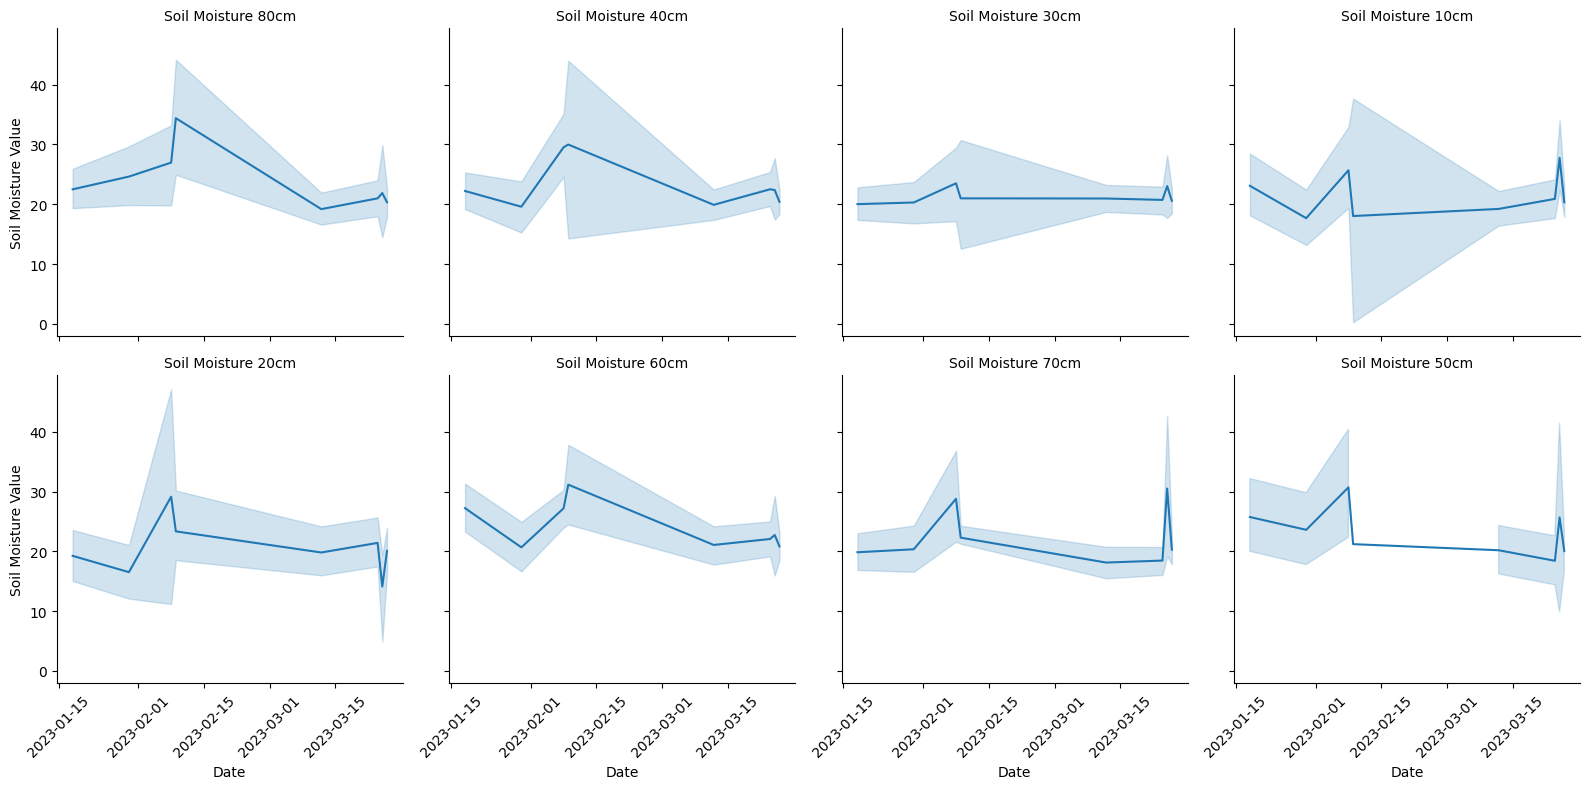

In [23]:

soil_df['local_time'] = pd.to_datetime(soil_df['local_time'])

# Extracting the date from 'local_time' to create a new column 'date'
soil_df['date'] = soil_df['local_time'].dt.date

# Filter rows where 'probe measure' contains Soil Moisture values
soil_moisture_table = soil_df[soil_df['probe_measure'].isin(soil_moisture_values)]

# Setting up a grid of side-by-side line plots
g = sns.FacetGrid(soil_moisture_table, col='probe_measure', col_wrap=4, height=4)
g.map(sns.lineplot, 'date', 'soil_value')

# Setting titles and labels
g.set_axis_labels('Date', 'Soil Moisture Value')
g.set_titles(col_template='{col_name}')

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

# Adjust layout
plt.tight_layout()

# Displaying the line plots
plt.show()


The code creates a grid of side-by-side line plots using the Seaborn library to visualize the trend of soil moisture values over time for different soil depths (10cm, 20cm, ..., 80cm). Each subplot represents a specific soil moisture level, and the x-axis shows the dates, while the y-axis represents the corresponding soil moisture values. The lines in each plot depict the temporal variation in soil moisture, allowing for easy comparison between different depths. The code provides a comprehensive view of how soil moisture changes over time across various depths, aiding in trend analysis and pattern identification.

# Comparing Soil Moisture Data from Fitzroy Gardens to the Overall Data



Site IDs with the property name 'Fitzroy Gardens': [50921, 50924, 65011, 75507, 51267, 51268, 75508, 64990, 65007]


We use these Site Ids to seperate data from the 2 sites and perform analysis.


In [62]:
# Filtering Site IDs corresponding to Fitzroy Gardens
Fitzroy_Garden_site_ids = ['50921', '50924', '65011', '75507', '51267', '51268', '75508', '64990', '65007']

# Creating a dataset for sensor readings from sites in Fitzroy Garden
FG_data = soil_moisture_table[soil_moisture_table['site_id'].isin(Fitzroy_Garden_site_ids)]

FG_data

,id,timestamp,size,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,date
9,e1f18a5d3bb4325d4f3905c4abdc4ee9db4adeef,2023-09-01T07:08:46.91Z,153,2023-01-18 07:00:00+00:00,Fitzroy Gardens West '18,65011,15754424,1305927,Soil Moisture 10cm,28.35,%VWC,SoilSensorData,2023-01-18
64,facd90e16e71ef92b9ea82c249971f92a56a7777,2023-09-01T07:08:46.91Z,145,2023-01-18 07:00:00+00:00,Fitzroy Gardens West '18,65011,15755100,1305924,Soil Moisture 10cm,16.18,ºC,SoilSensorData,2023-01-18
24,e430e38f708bca3735257fcf1719f3cc9be86c9e,2023-09-01T07:08:46.91Z,145,2023-01-18 13:00:00+00:00,Fitzroy Gardens East '18,64990,15757308,1305883,Soil Moisture 10cm,17.99,ºC,SoilSensorData,2023-01-18
64,149791d0f22c7501650a6754564b0a886d6a3f49,2023-09-01T07:08:46.91Z,139,2023-01-18 15:00:00+00:00,Fitzroy Gardens East '18,64990,15756028,1305869,Soil Moisture 10cm,44.44,%VWC,SoilSensorData,2023-01-18
64,20963485dd888f1e6a7c2fd195b3b0e953dfe4ea,2023-09-01T07:08:46.91Z,145,2023-01-18 15:00:00+00:00,Fitzroy Gardens East '18,64990,15757657,1305878,Soil Moisture 10cm,0.84,µS/cm,SoilSensorData,2023-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1893eee6cecdf9c08ebac07e61419e029daa4ee3,2023-09-01T07:08:46.91Z,145,2023-03-26 11:00:00+00:00,Fitzroy Gardens West '18,65011,16613979,1305915,Soil Moisture 80cm,0.33,µS/cm,SoilSensorData,2023-03-26
22,b72cb8ac9dedc00fbf192e4b609cbc4318803fc3,2023-09-01T07:08:46.91Z,145,2023-03-26 13:00:00+00:00,Fitzroy Gardens West '18,65011,16609642,1305921,Soil Moisture 80cm,14.12,ºC,SoilSensorData,2023-03-26
19,e8b5c87111acf95a611b323d8fe34675acfa07d6,2023-09-01T07:08:46.91Z,145,2023-03-26 13:00:00+00:00,Fitzroy Gardens East '18,64990,16610971,1305884,Soil Moisture 80cm,17.15,ºC,SoilSensorData,2023-03-26
18,fecf43ab69137ed491eb871588d2e01bf75b03da,2023-09-01T07:08:46.91Z,127,2023-03-26 13:00:00+00:00,Conservatory,75508,16612061,1619043,Soil Moisture 80cm,31.36,%VWC,SoilSensorData,2023-03-26


<ipython-input-74-56c182fd68bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FG_data['local_time'] = pd.to_datetime(FG_data['local_time'])
<ipython-input-74-56c182fd68bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FG_data['date'] = FG_data['local_time'].dt.date


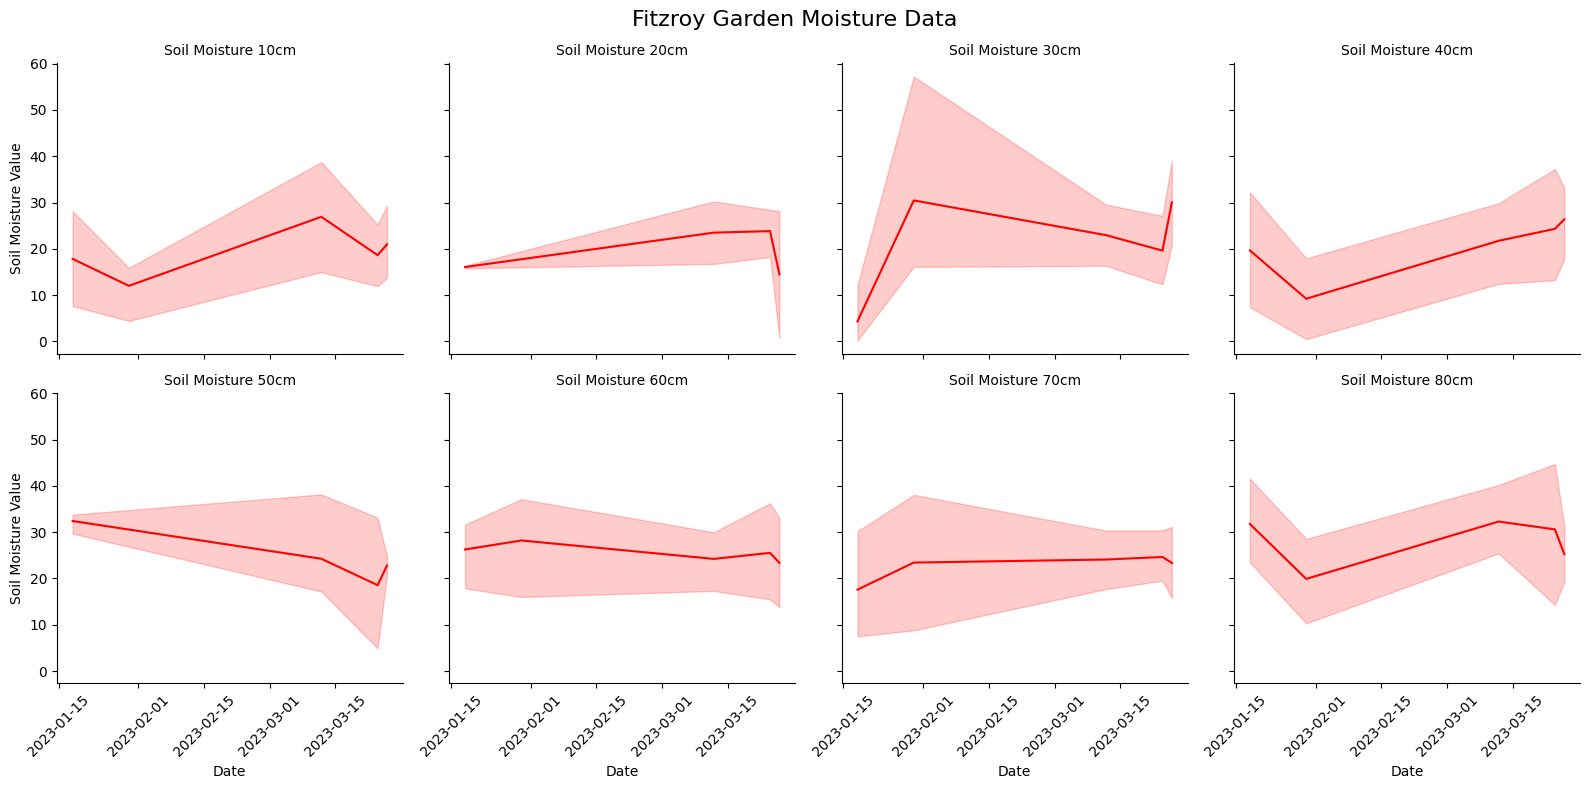

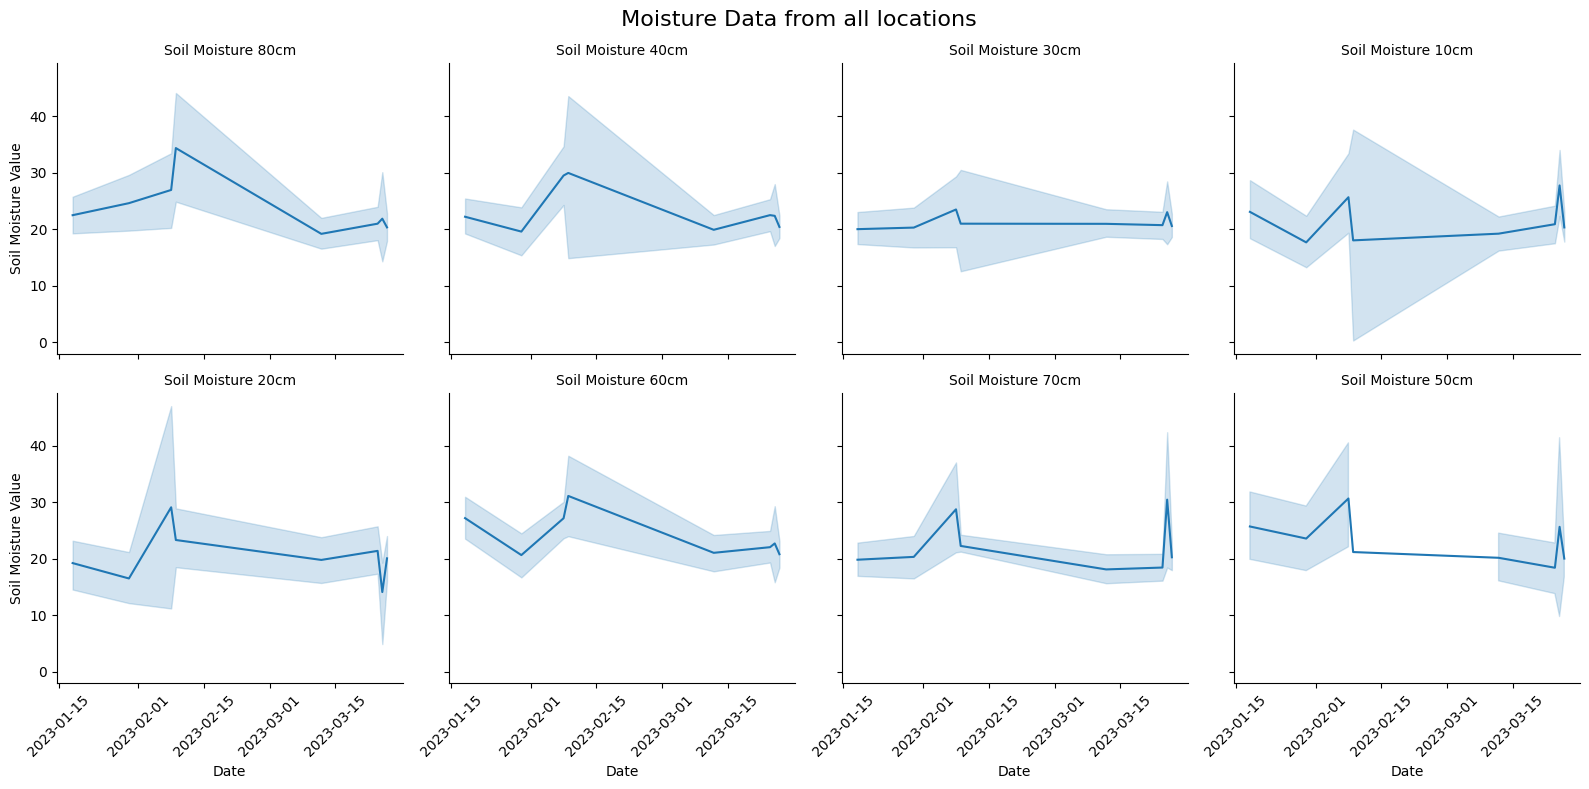

In [74]:
#line Plot for Fitzroy Garden Moisture Data
FG_data['local_time'] = pd.to_datetime(FG_data['local_time'])
FG_data['date'] = FG_data['local_time'].dt.date
soil_moisture_table_fg = FG_data[FG_data['probe_measure'].isin(soil_moisture_values)]

# Set up a grid of side-by-side line plots
g = sns.FacetGrid(soil_moisture_table_fg, col='probe_measure', col_wrap=4, height=4)

# Map line plots
g.map(sns.lineplot, 'date', 'soil_value', color='red')

#  titles and labels
g.set_axis_labels('Date', 'Soil Moisture Value')
g.set_titles(col_template='{col_name}')

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

plt.suptitle("Fitzroy Garden Moisture Data", fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the line plots
plt.show()

#lineplot for overall Data
soil_df['local_time'] = pd.to_datetime(soil_df['local_time'])
soil_df['date'] = soil_df['local_time'].dt.date
soil_moisture_table = soil_df[soil_df['probe_measure'].isin(soil_moisture_values)]

# Setting up a grid of side-by-side line plots
g = sns.FacetGrid(soil_moisture_table, col='probe_measure', col_wrap=4, height=4)
g.map(sns.lineplot, 'date', 'soil_value')

# Setting titles and labels, and displaying them side by side
g.set_axis_labels('Date', 'Soil Moisture Value')
g.set_titles(col_template='{col_name}', fontsize=12)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)


plt.suptitle(" Moisture Data from all locations", fontsize=16)

# Adjust layout
plt.tight_layout()

# Displaying the line plots
plt.show()




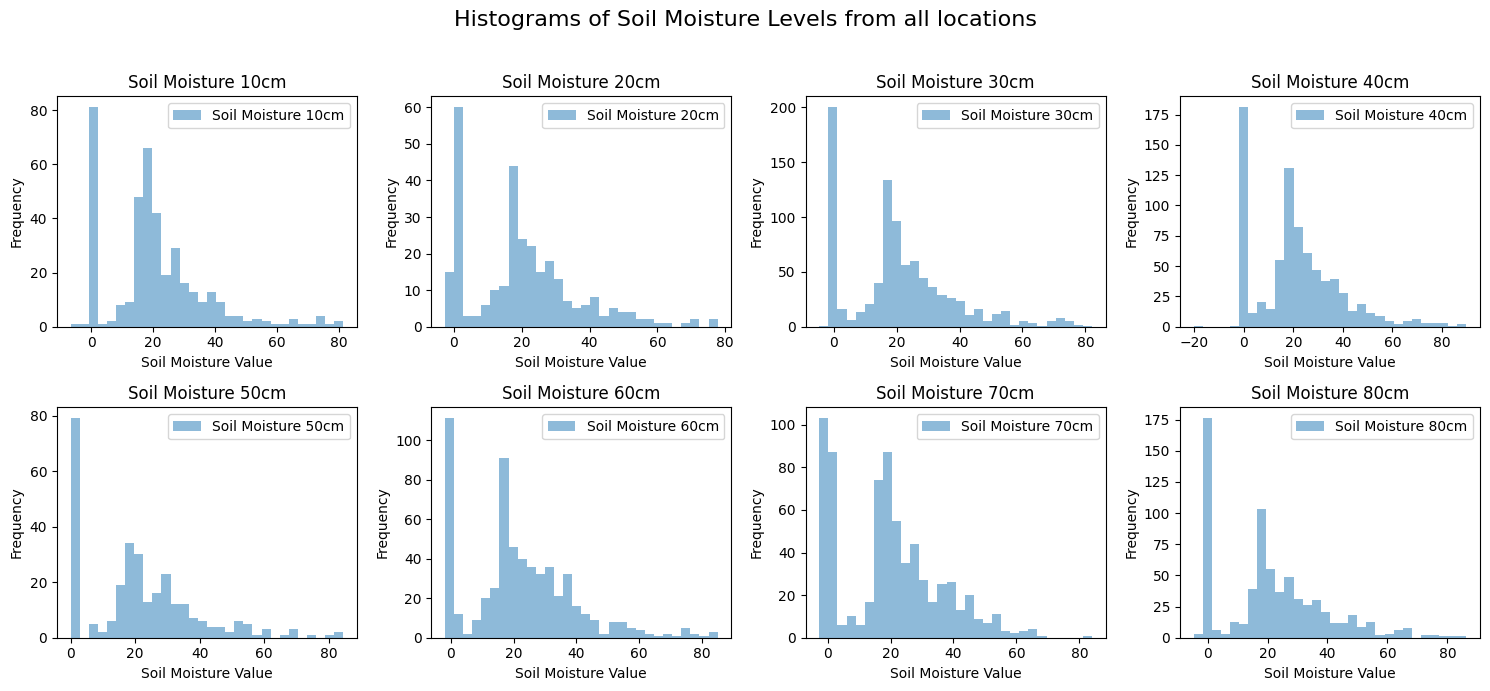

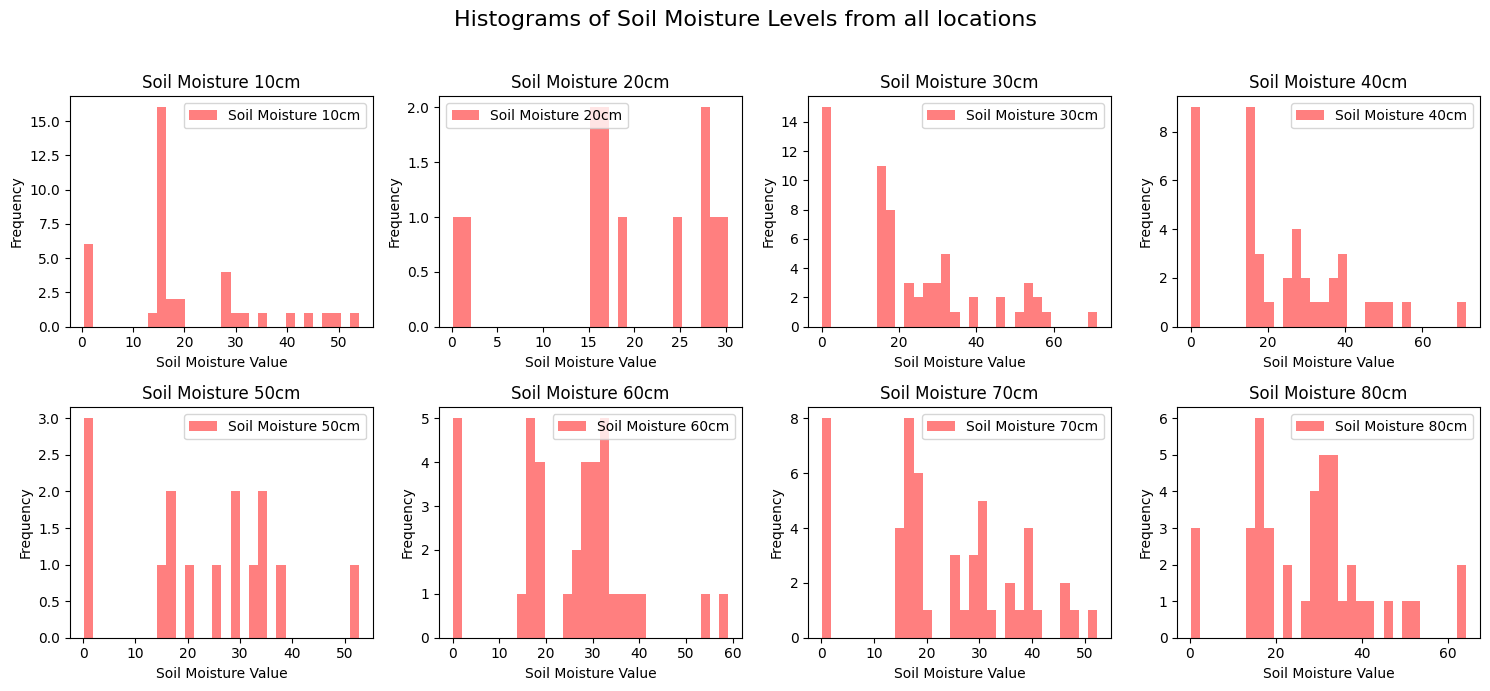

In [77]:
# Histogram for moisture data from all the locations
soil_moisture_table = soil_df[soil_df['probe_measure'].isin(soil_moisture_values)]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Moisture Levels from all locations', fontsize=16)

# Ploting histograms for each soil moisture level
for i, moisture_level in enumerate(soil_moisture_values):
    subset = soil_moisture_table[soil_moisture_table['probe_measure'] == moisture_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=moisture_level)
    axes[row, col].set_title(moisture_level)
    axes[row, col].set_xlabel('Soil Moisture Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Histogram for moisture data from Fitzroy Gardens
soil_moisture_table = FG_data[FG_data['probe_measure'].isin(soil_moisture_values)]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Moisture Levels from Fitzroy Gardens', fontsize=16)

# Ploting histograms for each soil moisture level in red

for i, moisture_level in enumerate(soil_moisture_values):
    subset = soil_moisture_table[soil_moisture_table['probe_measure'] == moisture_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=moisture_level, color='red')  # Set color to red
    axes[row, col].set_title(moisture_level)
    axes[row, col].set_xlabel('Soil Moisture Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



From the above plots we can see various differences in the overall trend of Fitzroy Garden data as compared to the Overall Data showcasing the difference of soil conditions at various locations. From this we have established that the Soil Conditions in various locations in Melbourne vary a lot and hence going forward in the study we should inspect trends in the soil readings from each location seperately in order to be able to have a nuanced view of the soil conditions.


# Soil Temperature Analysis

In the following part we will analyse the sensor readings data that is related to the soil temperature from the various sensor locations.

In [78]:
# Define the values related to Soil Temperature
soil_temperature_values = ['Soil Temperature 10cm', 'Soil Temperature 20cm', 'Soil Temperature 30cm',
                            'Soil Temperature 40cm', 'Soil Temperature 50cm', 'Soil Temperature 60cm',
                            'Soil Temperature 70cm', 'Soil Temperature 80cm']

# Filter rows where 'probe measure' contains Soil Temperature values
soil_temperature_table = soil_df[soil_df['probe_measure'].isin(soil_temperature_values)]

# Sort the table by 'local_time'
soil_temperature_table = soil_temperature_table.sort_values(by=['probe_measure', 'local_time'])

# Display the new table for Soil Temperature
soil_temperature_table


,id,timestamp,size,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,date
20,d6d74cf25bcbf55c717463057aa661a12d07b387,2023-09-01T07:08:46.91Z,141,2023-01-18 05:30:00+00:00,Princess bridge NW p01,101032,15754506,2019262,Soil Temperature 10cm,17.78,ºC,SoilSensorData,2023-01-18
20,d9739b88df390230c32ce075f05e61f649bd8400,2023-09-01T07:08:46.91Z,141,2023-01-18 06:00:00+00:00,Princess bridge NW p01,101032,15756578,2019270,Soil Temperature 10cm,0.08,µS/cm,SoilSensorData,2023-01-18
8,e743a2d39d00e2a48256f0358bb6863b6c462549,2023-09-01T07:08:46.91Z,141,2023-01-18 08:00:00+00:00,Princess bridge SW p10,101034,15754422,2019290,Soil Temperature 10cm,0.03,µS/cm,SoilSensorData,2023-01-18
8,584141a83e976650d0f31fc3fa8614bef2acd93e,2023-09-01T07:08:46.91Z,148,2023-01-18 08:30:00+00:00,Princess bridge East p06,101038,15756664,2019376,Soil Temperature 10cm,18.25,%VWC,SoilSensorData,2023-01-18
20,4471e25ea5a261f455fdda43483fe118a5d8c21f,2023-09-01T07:08:46.91Z,141,2023-01-18 08:30:00+00:00,Princess bridge SE P01,101036,15756741,2019327,Soil Temperature 10cm,0.01,µS/cm,SoilSensorData,2023-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,6ca39abfc55ea1057cc3f29bef9e62878a4ff276,2023-09-01T07:08:46.91Z,146,2023-03-26 17:00:00+00:00,Princess bridge SW p10,101034,16611576,2019293,Soil Temperature 80cm,10.41,%VWC,SoilSensorData,2023-03-26
17,8e23f682c381bcbd0947fab62dd0c711e99adb6e,2023-09-01T07:08:46.91Z,148,2023-03-26 17:00:00+00:00,Flagstaff Gardens 2,65014,16612033,1306602,Soil Temperature 80cm,34.39,%VWC,SoilSensorData,2023-03-26
17,741b3bfef54f8725a9f836f821ceb08c01ee1760,2023-09-01T07:08:46.91Z,131,2023-03-26 17:00:00+00:00,Toms Block,66190,16612712,1338406,Soil Temperature 80cm,0.47,µS/cm,SoilSensorData,2023-03-26
17,bddf2eedbbb1c53d9f9d71f277234656abe00341,2023-09-01T07:08:46.91Z,135,2023-03-26 17:00:00+00:00,Bourke North 2,65006,16612684,1311832,Soil Temperature 80cm,18.24,ºC,SoilSensorData,2023-03-26


The code filters the `soil_df` DataFrame to include rows related to Soil Temperature values, sorts the resulting table by probe measure and local time, and displays the new table. The output shows a structured view of Soil Temperature data, sorted by depth levels, providing insights into the recorded measurements over time.

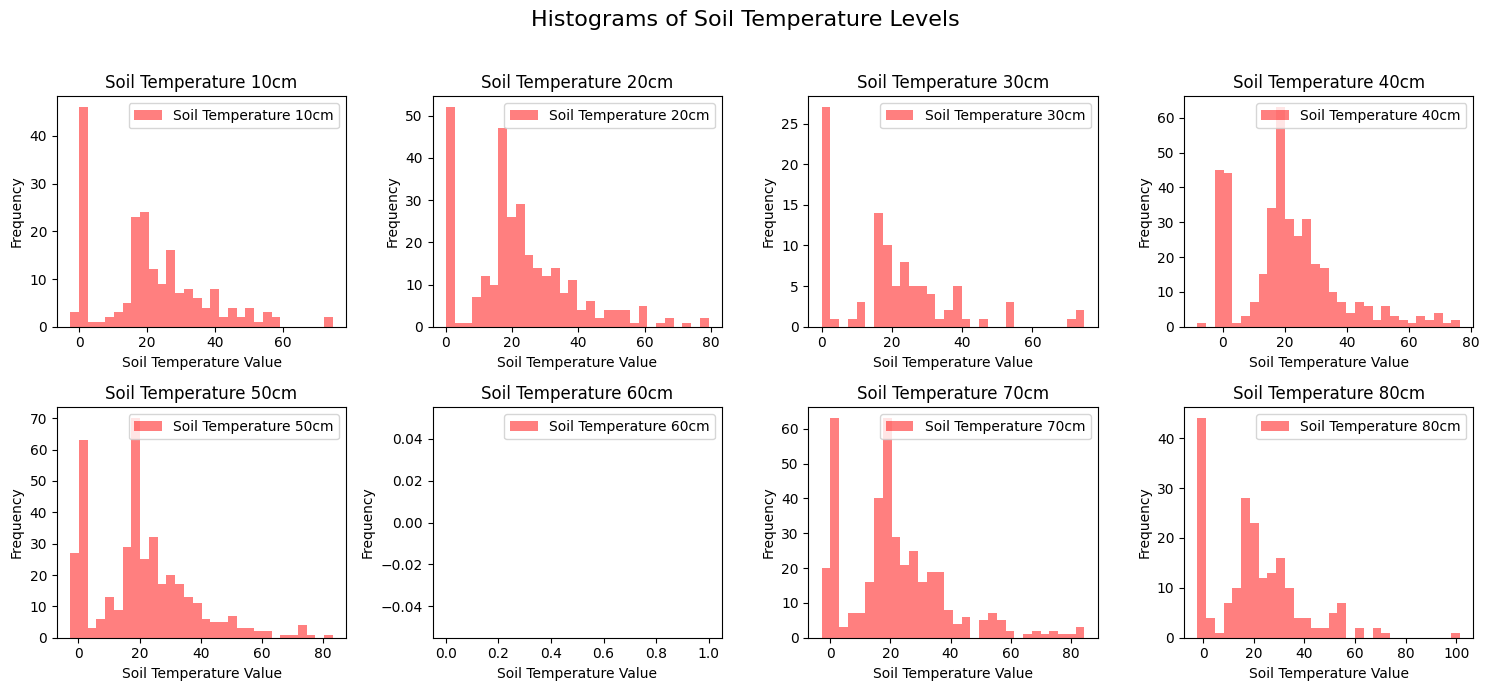

In [79]:
# Filter rows where 'probe measure' contains Soil Temperature values
soil_temperature_table = soil_df[soil_df['probe_measure'].isin(soil_temperature_values)]

# Create subplots for histograms of Soil Temperature levels
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Temperature Levels', fontsize=16)

# Plot histograms for each soil temperature level
for i, temperature_level in enumerate(soil_temperature_values):
    subset = soil_temperature_table[soil_temperature_table['probe_measure'] == temperature_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=temperature_level, color='orange')
    axes[row, col].set_title(temperature_level)
    axes[row, col].set_xlabel('Soil Temperature Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Adjust layout to prevent overlap of subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


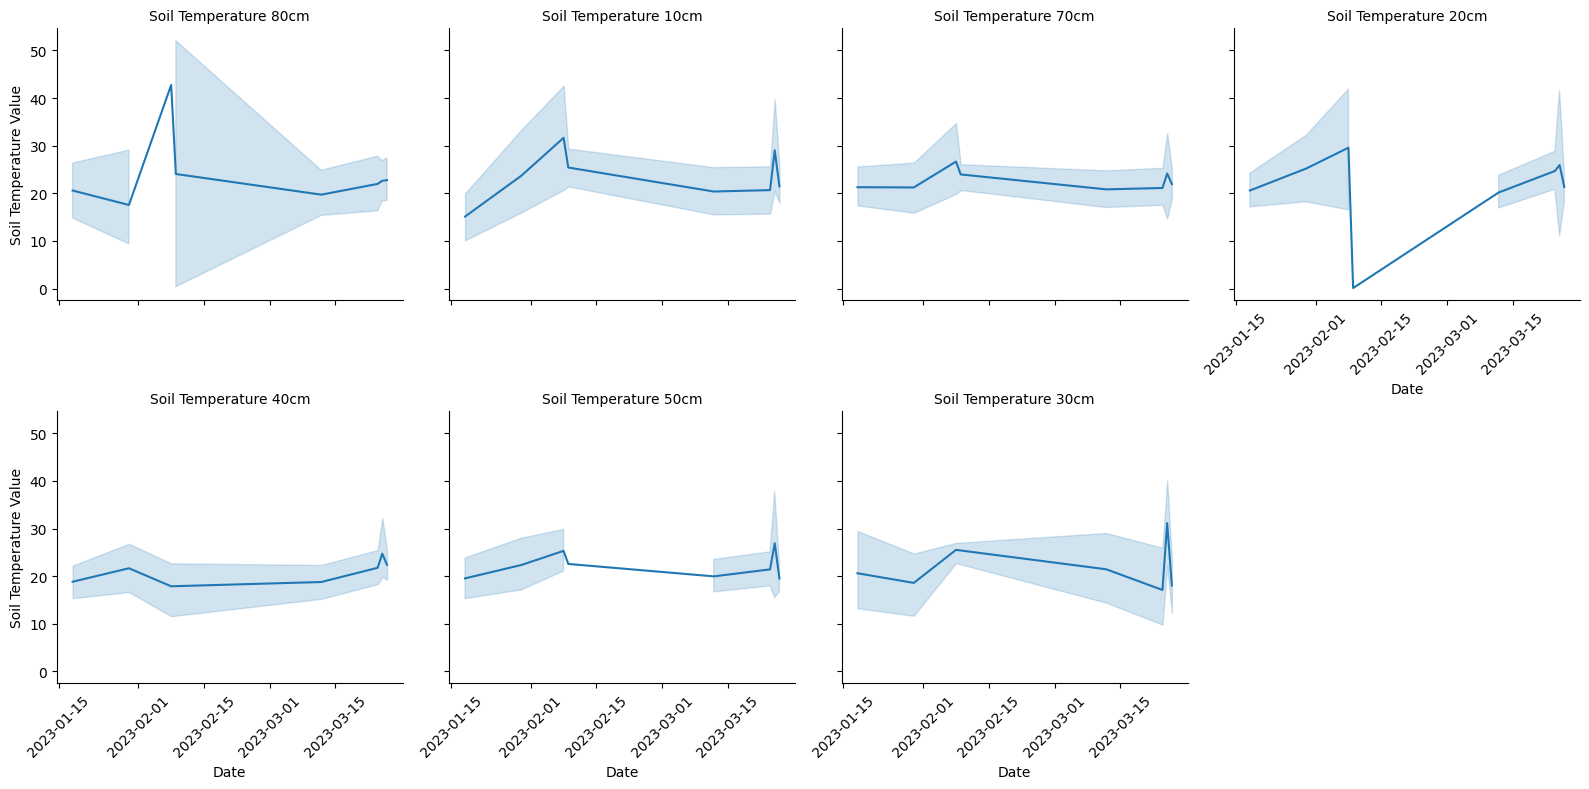

In [88]:

soil_df['local_time'] = pd.to_datetime(soil_df['local_time'])

# Extracting the date from 'local_time' to create a new column 'date'
soil_df['date'] = soil_df['local_time'].dt.date

# Filter rows where 'probe measure' contains Soil Moisture values
soil_temperature_table = soil_df[soil_df['probe_measure'].isin(soil_temperature_values)]

# Setting up a grid of side-by-side line plots
g = sns.FacetGrid(soil_temperature_table, col='probe_measure', col_wrap=4, height=4)
g.map(sns.lineplot, 'date', 'soil_value')

# Setting titles and labels
g.set_axis_labels('Date', 'Soil Temperature Value')
g.set_titles(col_template='{col_name}')

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

# Adjust layout
plt.tight_layout()

# Displaying the line plots
plt.show()

From the above plots we find that there are missing values for Soil Temperature at the depth of 60cm.

# Comparing Soil Temperature Data from Fitzroy Gardens to the Overall Data



Site IDs with the property name 'Fitzroy Gardens': [50921, 50924, 65011, 75507, 51267, 51268, 75508, 64990, 65007]


We use these Site Ids to seperate data from the 2 sites and perform analysis.

In [83]:
# Filtering Site IDs corresponding to Fitzroy Gardens
Fitzroy_Garden_site_ids = ['50921', '50924', '65011', '75507', '51267', '51268', '75508', '64990', '65007']

# Creating a dataset for sensor readings from sites in Fitzroy Garden
FG_Temp = soil_temperature_table[soil_temperature_table['site_id'].isin(Fitzroy_Garden_site_ids)]


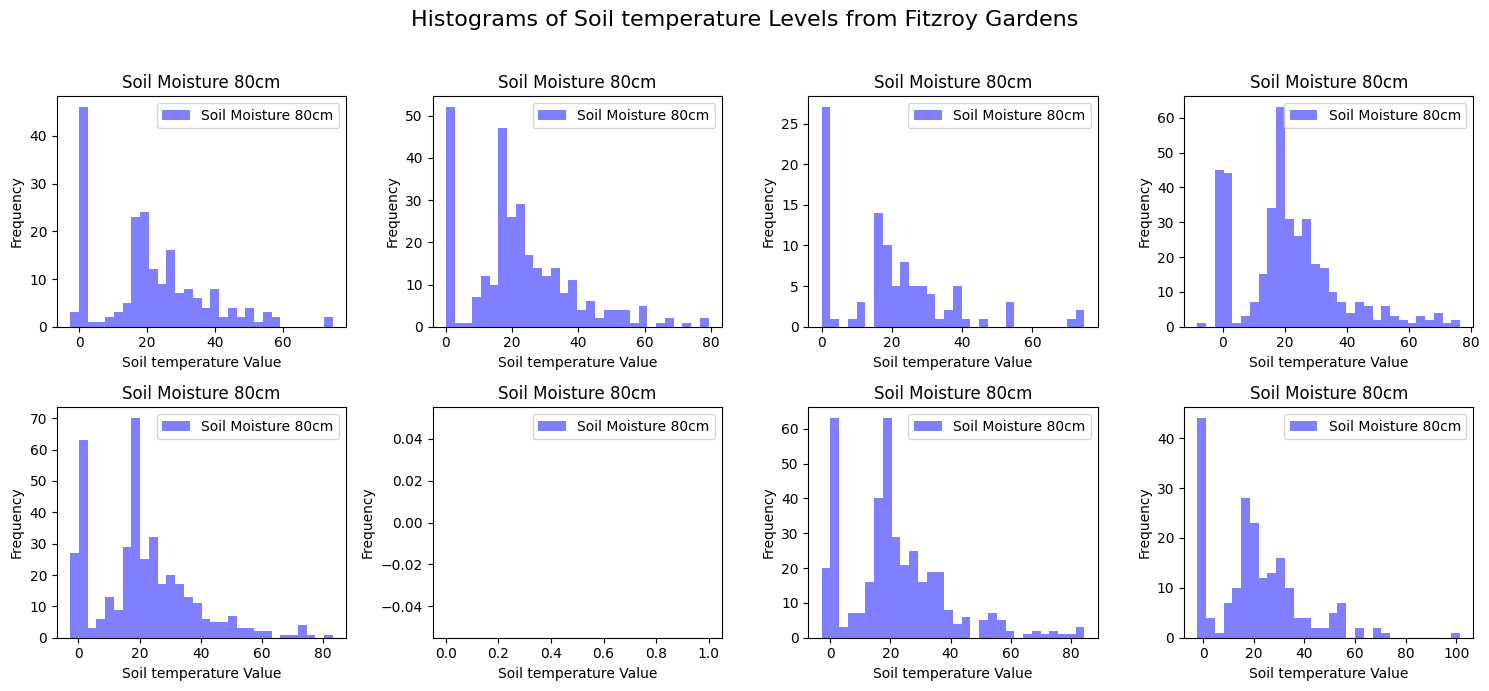

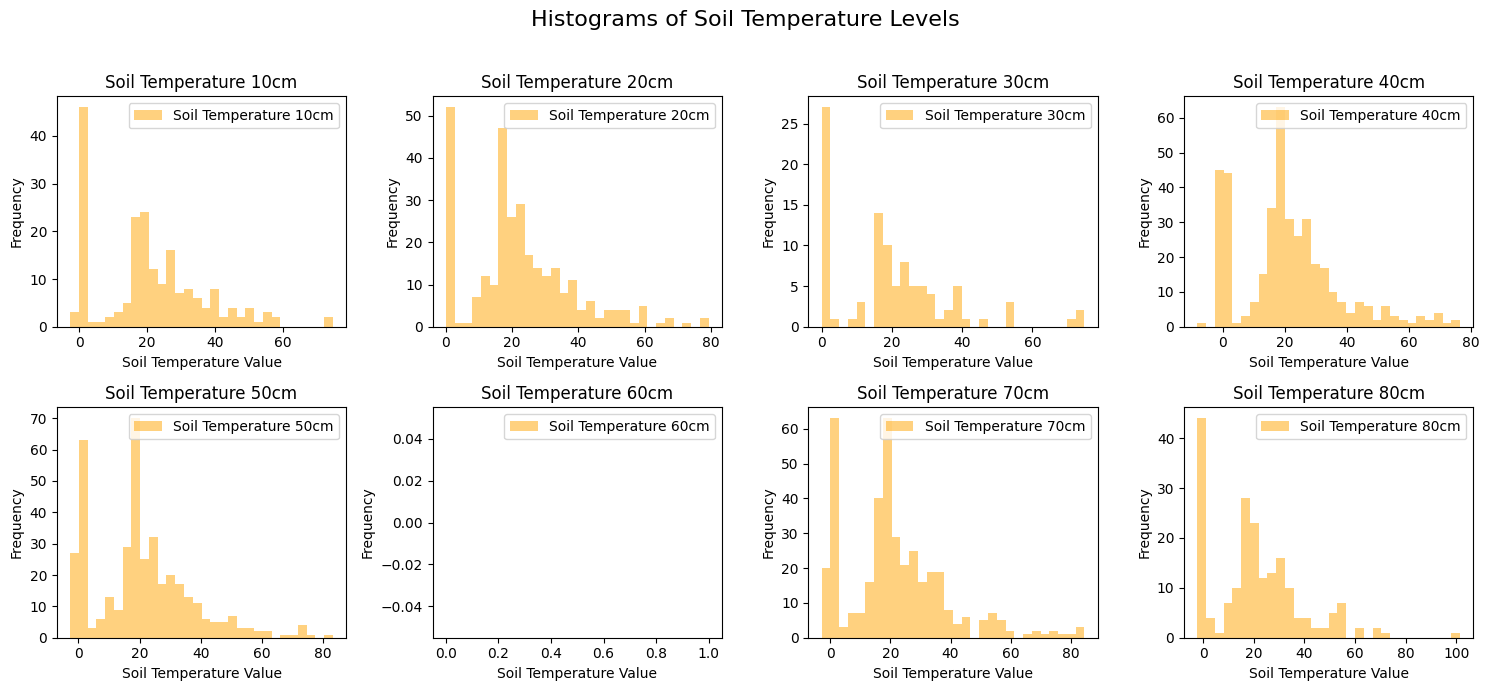

In [87]:
# Histogram for moisture data from Fitzroy Gardens
soil_Temperature_table = FG_Temp[FG_Temp['probe_measure'].isin(soil_temperature_values)]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil temperature Levels from Fitzroy Gardens', fontsize=16)

# Ploting histograms for each soil Temperature level in red

for i, temperature_level in enumerate(soil_temperature_values):
    subset = soil_temperature_table[soil_temperature_table['probe_measure'] == temperature_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=moisture_level, color='blue')
    axes[row, col].set_title(moisture_level)
    axes[row, col].set_xlabel('Soil temperature Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Filter rows where 'probe measure' contains Soil Temperature values
soil_temperature_table = soil_df[soil_df['probe_measure'].isin(soil_temperature_values)]

# Create subplots for histograms of Soil Temperature levels
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Temperature Levels', fontsize=16)

# Plot histograms for each soil temperature level
for i, temperature_level in enumerate(soil_temperature_values):
    subset = soil_temperature_table[soil_temperature_table['probe_measure'] == temperature_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=temperature_level, color='orange')
    axes[row, col].set_title(temperature_level)
    axes[row, col].set_xlabel('Soil Temperature Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Adjust layout to prevent overlap of subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Soil Salinity Analysis

In the following part we will analyse the sensor readings data that is related to the soil temperature from the various sensor locations.

In [89]:
# Define the values related to Soil Salinity
soil_salinity_values = ['Soil Salinity 10cm', 'Soil Salinity 20cm', 'Soil Salinity 30cm',
                        'Soil Salinity 40cm', 'Soil Salinity 50cm', 'Soil Salinity 60cm',
                        'Soil Salinity 70cm', 'Soil Salinity 80cm']

# Filter rows where 'probe measure' contains Soil Salinity values
soil_salinity_table = soil_df[soil_df['probe_measure'].isin(soil_salinity_values)]

# Sort the table by 'local_time'
soil_salinity_table = soil_salinity_table.sort_values(by=['probe_measure', 'local_time'])

# Display the new table for Soil Salinity
soil_salinity_table


,id,timestamp,size,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,date
78,769a2a1a61401012b06b936ba1977b24a882d4b8,2023-09-01T07:08:46.91Z,132,2023-01-18 06:00:00+00:00,Bourke South 3,88425,15755208,1914096,Soil Salinity 10cm,0.17,µS/cm,SoilSensorData,2023-01-18
67,cb18b237a70992b6cadf39eeaadcbf3eab5f18bf,2023-09-01T07:08:46.91Z,136,2023-01-18 06:00:00+00:00,Bourke South 3,88425,15754653,1914107,Soil Salinity 10cm,30.60,%VWC,SoilSensorData,2023-01-18
78,097047fdaceb8f50950baedab2b07d1a19fd6c35,2023-09-01T07:08:46.91Z,135,2023-01-18 07:00:00+00:00,Bourke North 5,66201,15754686,1310539,Soil Salinity 10cm,23.64,ºC,SoilSensorData,2023-01-18
78,a856e4dee5fcdc9ded1186413d54bdd2321ecf1c,2023-09-01T07:08:46.91Z,151,2023-01-18 07:00:00+00:00,Treasury Gardens North,64988,15754705,1305964,Soil Salinity 10cm,31.38,%VWC,SoilSensorData,2023-01-18
78,3a6d000ece5ac4e7003085defdef8f86a0e564e6,2023-09-01T07:08:46.91Z,142,2023-01-18 07:00:00+00:00,Treasury Gardens North,64988,15758318,1305947,Soil Salinity 10cm,0.10,µS/cm,SoilSensorData,2023-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,09732aef7056bc5e52a540cfdcc2adc13af399ab,2023-09-01T07:08:46.91Z,147,2023-03-26 15:00:00+00:00,Alexandra Gardens Engineers Lawn,66195,16610357,1338748,Soil Salinity 70cm,22.13,%VWC,SoilSensorData,2023-03-26
48,cbb4be006e43b711593bf7249cc89bc5deb98610,2023-09-01T07:08:46.91Z,138,2023-03-26 15:00:00+00:00,Kings Domain North,66203,16611634,1338345,Soil Salinity 70cm,18.40,ºC,SoilSensorData,2023-03-26
48,e93b4f814954df0ae56bc7688c03a7781432e157,2023-09-01T07:08:46.91Z,147,2023-03-26 15:00:00+00:00,Alexandra Gardens Engineers Lawn,66195,16613816,1338719,Soil Salinity 70cm,26.09,%VWC,SoilSensorData,2023-03-26
48,7a5266e71074fda3199ae512502de0c59c2c5d2e,2023-09-01T07:08:46.91Z,146,2023-03-26 16:00:00+00:00,Princess bridge NW p01,101032,16615530,2019273,Soil Salinity 70cm,11.97,%VWC,SoilSensorData,2023-03-26


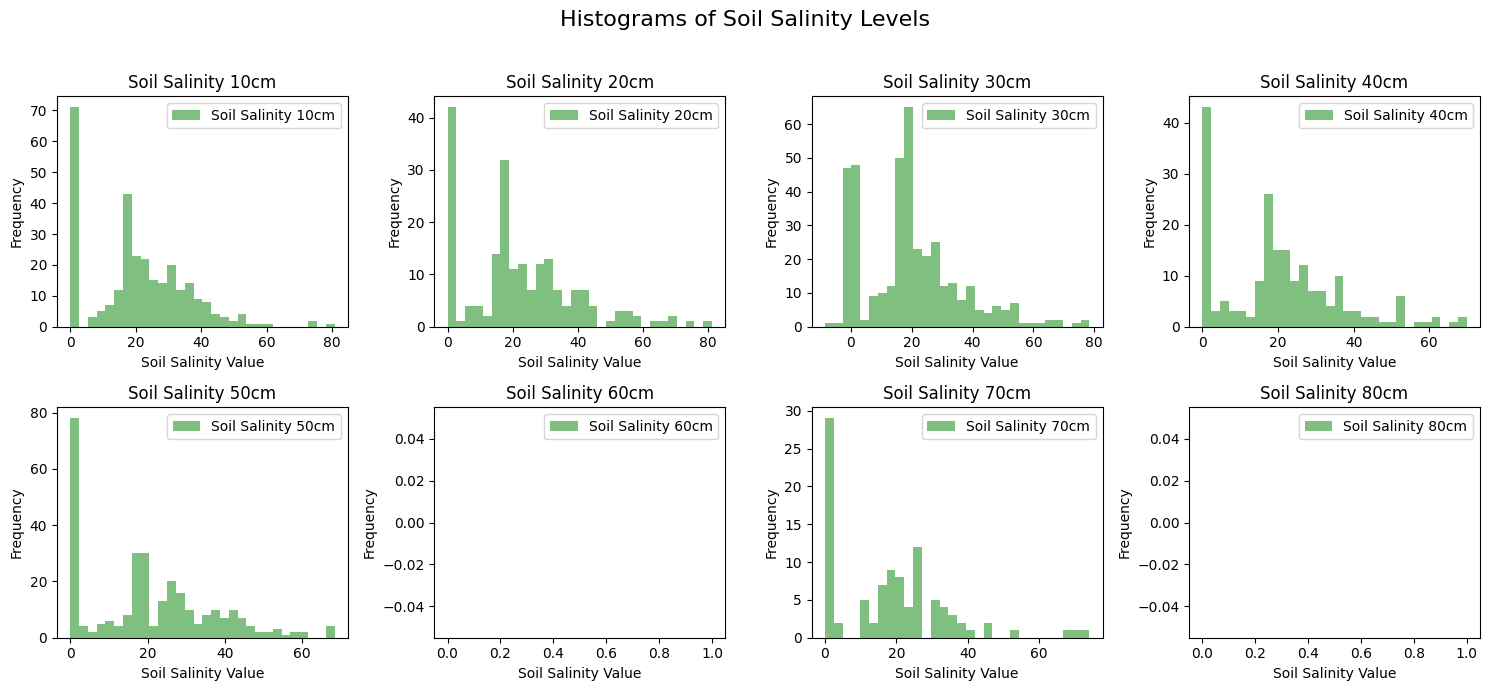

In [90]:
# Filter rows where 'probe measure' contains Soil Salinity values
soil_salinity_table = soil_df[soil_df['probe_measure'].isin(soil_salinity_values)]

# Create subplots for histograms of Soil Salinity levels
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
fig.suptitle('Histograms of Soil Salinity Levels', fontsize=16)

# Plot histograms for each soil salinity level
for i, salinity_level in enumerate(soil_salinity_values):
    subset = soil_salinity_table[soil_salinity_table['probe_measure'] == salinity_level]
    row, col = divmod(i, 4)

    axes[row, col].hist(subset['soil_value'], bins=30, alpha=0.5, label=salinity_level, color='green')
    axes[row, col].set_title(salinity_level)
    axes[row, col].set_xlabel('Soil Salinity Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Adjust layout to prevent overlap of subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


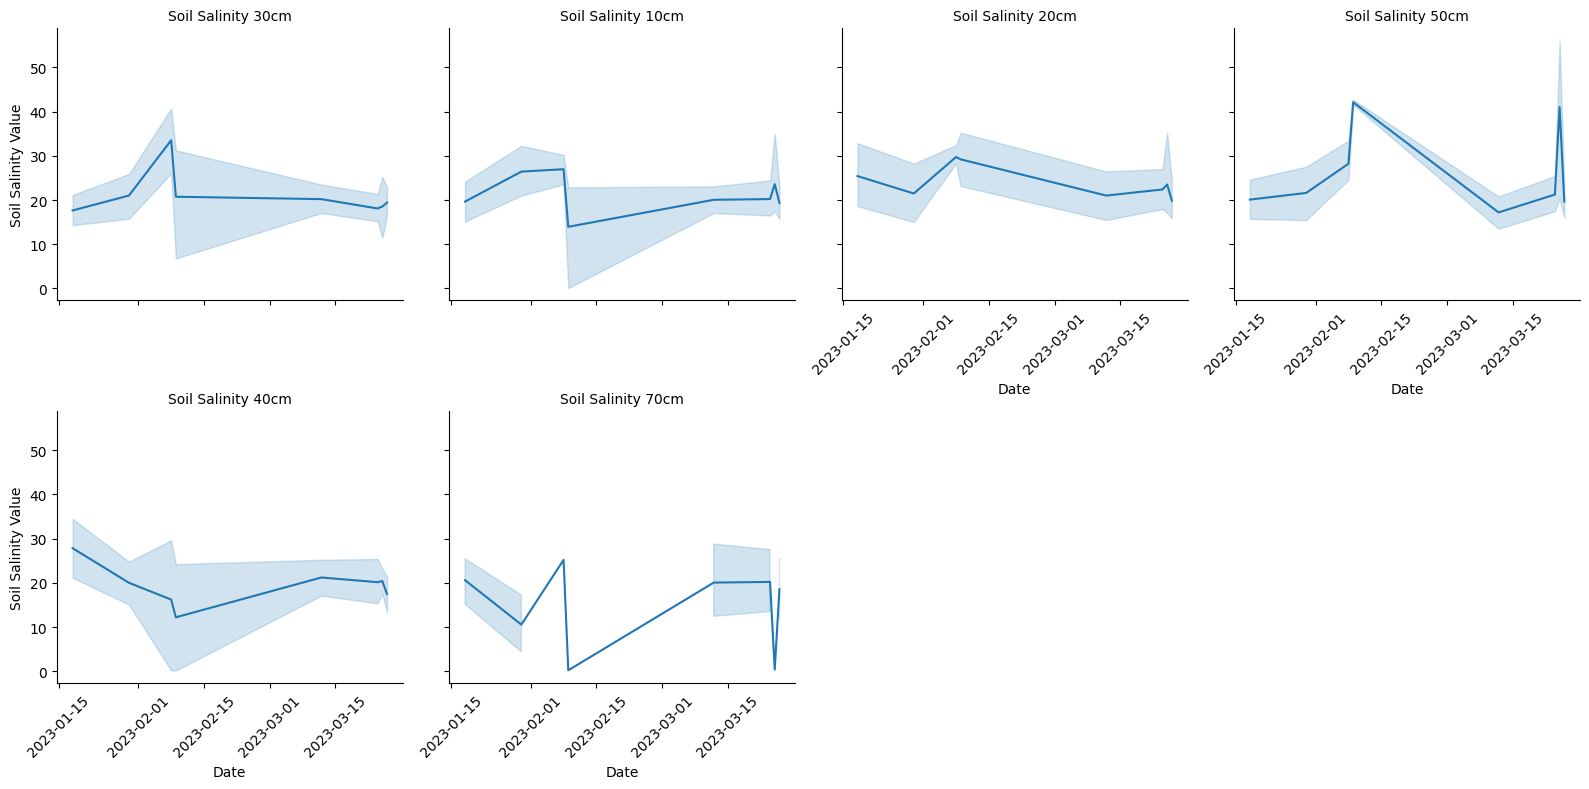

In [91]:

soil_salinity_table = soil_df[soil_df['probe_measure'].isin(soil_salinity_values)]

# Setting up a grid of side-by-side line plots for Soil Salinity
g = sns.FacetGrid(soil_salinity_table, col='probe_measure', col_wrap=4, height=4)
g.map(sns.lineplot, 'date', 'soil_value')

# Setting titles and labels
g.set_axis_labels('Date', 'Soil Salinity Value')
g.set_titles(col_template='{col_name}')

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

# Adjust layout
plt.tight_layout()

# Displaying the line plots for Soil Salinity
plt.show()
